   Feature_1  Feature_2  Cluster
0  -7.726421  -8.394957        2
1   5.453396   0.742305        1
2  -2.978672   9.556846        0
3   6.042673   0.571319        1
4  -6.521840  -6.319325        2


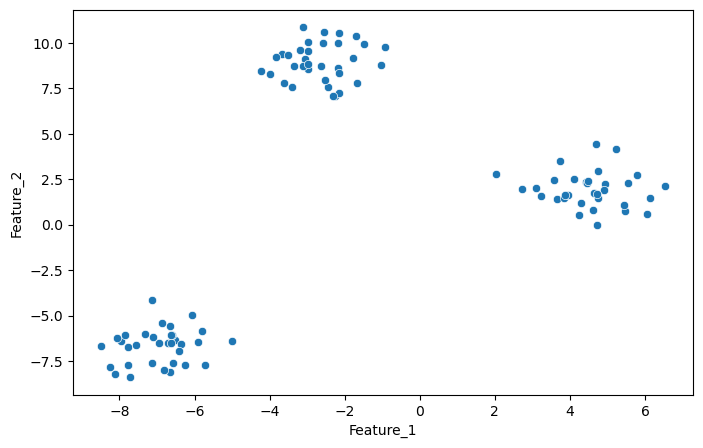

        Feature_1  Feature_2
mean    -1.716279   1.474851
median  -2.603027   1.922690
var     23.081054  42.317376


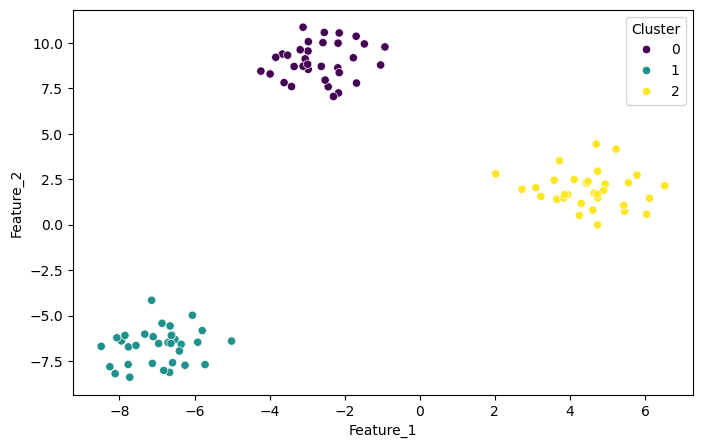

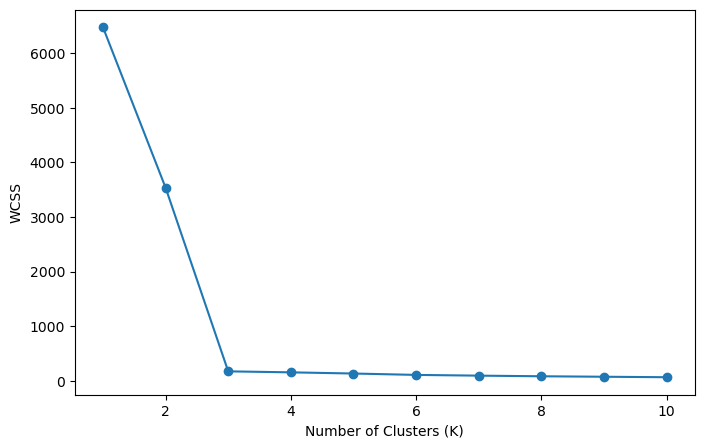

Silhouette Scores: [0.4961377865404629, 0.8469881221532085, 0.6586325419766833, 0.49822438080406817]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv("Day_28_Clustering_Dataset.csv")

print(df.head())

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'])
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

stats = df[['Feature_1', 'Feature_2']].agg(['mean', 'median', 'var'])
print(stats)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Cluster'], palette="viridis")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Feature_1', 'Feature_2']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])
    silhouette_scores.append(silhouette_score(df[['Feature_1', 'Feature_2']], labels))

print(f"Silhouette Scores: {silhouette_scores}")


#### Elbow Curve Observation:
- The optimal K is where the WCSS curve shows a clear bend.

Clustering Performance:
- The algorithm separated clusters but might misclassify overlapping points.

Increasing K:
- Leads to over-segmentation and reduced interpretability.

Limitations:
- Sensitive to initial centroids and assumes spherical clusters.

Improvements:
- Use DBSCAN or hierarchical clustering for better separation.
- Scale features to improve cluster separation.